# Harry Potter Analysis

### Overview

In this project, we will be gathering data from the Harry Potter book series and film series. Using this data, we will keep track of the different spells quoted in the book series and film series. As well as, which spells are most frequently associated with each character in Harry Potter. We will create different graphs to represent the difference between the book series and film series, in terms of the spells quoted. We will also dive deeper into a few of the main characters in the Harry Potter series and see which spells they used in the film series.

### Datasets Used
 - Link to dataset: https://www.kaggle.com/datasets/balabaskar/harry-potter-books-corpora-part-1-7
 - Description: All Harry Potter books were in the form of a text file which was analyzed by looking at what spells were quoted.
 ***
 - Link to dataset: https://www.kaggle.com/datasets/maricinnamon/harry-potter-movies-dataset
 - Description: This dataset included a CSV file of all the spells in the Harry Potter series which was used during the book series analysis and film series analysis. This dataset also included a CSV file of certain dialogue scenes along with the character that said each dialogue scene in the film series. This was used to seperate with dialogue scenes included one or more spell and which character quoted it.
***
 - Link to film scripts: https://www.scriptslug.com/
 - Description: This website contained the film scripts for the Harry Potter film series in form of a PDF file which was analyzed to compare the book series to the film series, in terms of spells used.
 
 
#### This analysis includes all films & books in the series, excluding "Harry Potter and the Order of the Phoenix". Note that the fifth book and film was not included in this analysis since the film script could not be located.

## Analyzing the spells in the Harry Potter Book Series

There are approximately 61 spells that exist in the Harry Potter series. However, only 36 spells were mentioned in the entire book series. Analyzing the bar graph, we can see that the spell mentioned most frequently throughout all the books is "Finite" - the General Counter-Spell.
Since we will also be analyzing all the Harry Potter movies except for "Harry Potter and the Order of the Phoenix", we'll also be doing the same for the book series. Without including the "Harry Potter and the Order of the Phoenix" book, 33 spells were mentioned in the book series. Analyzing the bar graph, we can see that the spell mentioned most frequently is still "Finite" - the General Counter-Spell.

#### Setup

In [1]:
import os 
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pylab as plt
from PyPDF2 import PdfReader
import plotly.express as px
import csv
import re
from collections import ChainMap 
from collections import defaultdict
%matplotlib inline

#### Book Analysis

In [2]:
#Open spells.csv and only get the spells column
spells = pd.read_csv('Harry_Potter_Movies/Spells.csv')
spells = spells['Incantation'].tolist()

#Read each book txt file
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        output = f.read().replace('\n', ' ')
        return output  

#List out all the files in the books folder  
path = "hp-books/books/"
all_files = os.listdir(path)
tracker = dict()
output = ''

#Open each book in the folder 
for file in all_files:
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{'hp-books/books'}/{file}"

        # call read text file function
        output = read_text_file(file_path)
        output = output
        
        #Keep track of occurances of each spell with a dictionary
        for i in spells:
            occurrences = output.lower().count(i.lower())
            if occurrences > 1:
                tracker[i] = tracker.get(i,0) + occurrences


trackerOutFive = dict()
outputOutFive = ''

#Open each book in the folder EXCEPT for book 5
for file in all_files:
    # Check whether file is in text format or not
    if file.endswith(".txt") and not file.endswith("Book5.txt"):
        file_path = f"{'hp-books/books'}/{file}"

        # call read text file function
        outputOutFive = read_text_file(file_path)
        outputOutFive = outputOutFive
        
        #Keep track of occurances of each spell with a dictionary
        for i in spells:
            occurrencesOutFive = outputOutFive.lower().count(i.lower())
            if occurrencesOutFive > 1:
                trackerOutFive[i] = trackerOutFive.get(i,0) + occurrencesOutFive


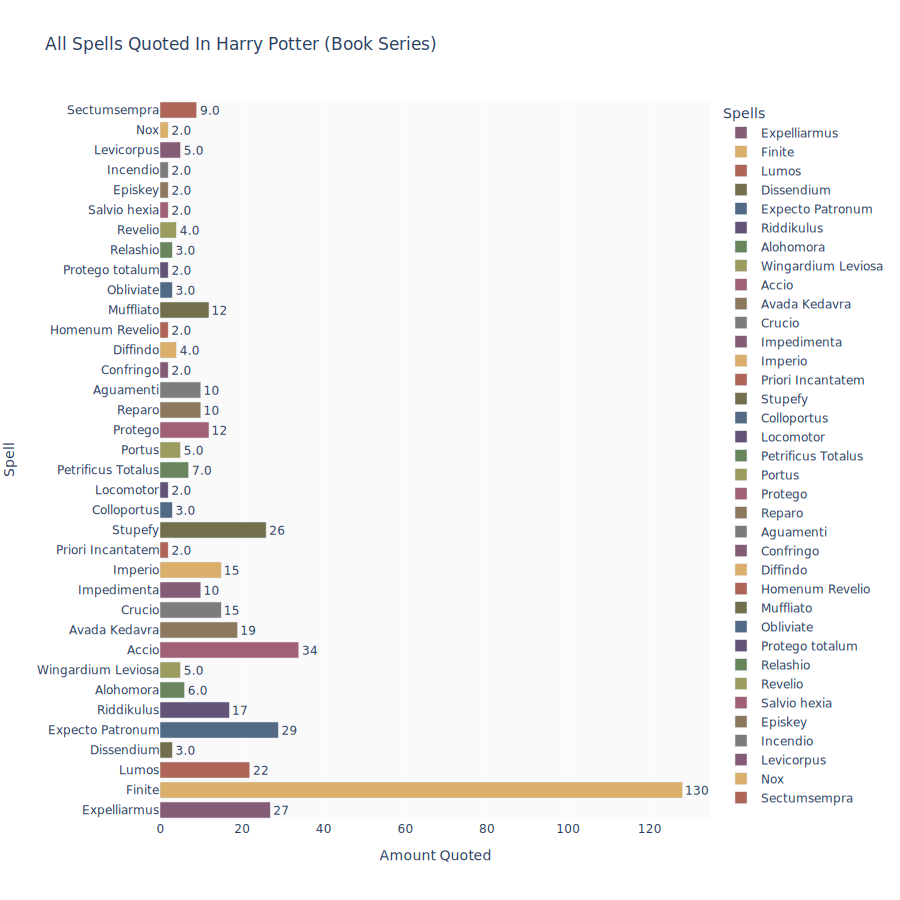

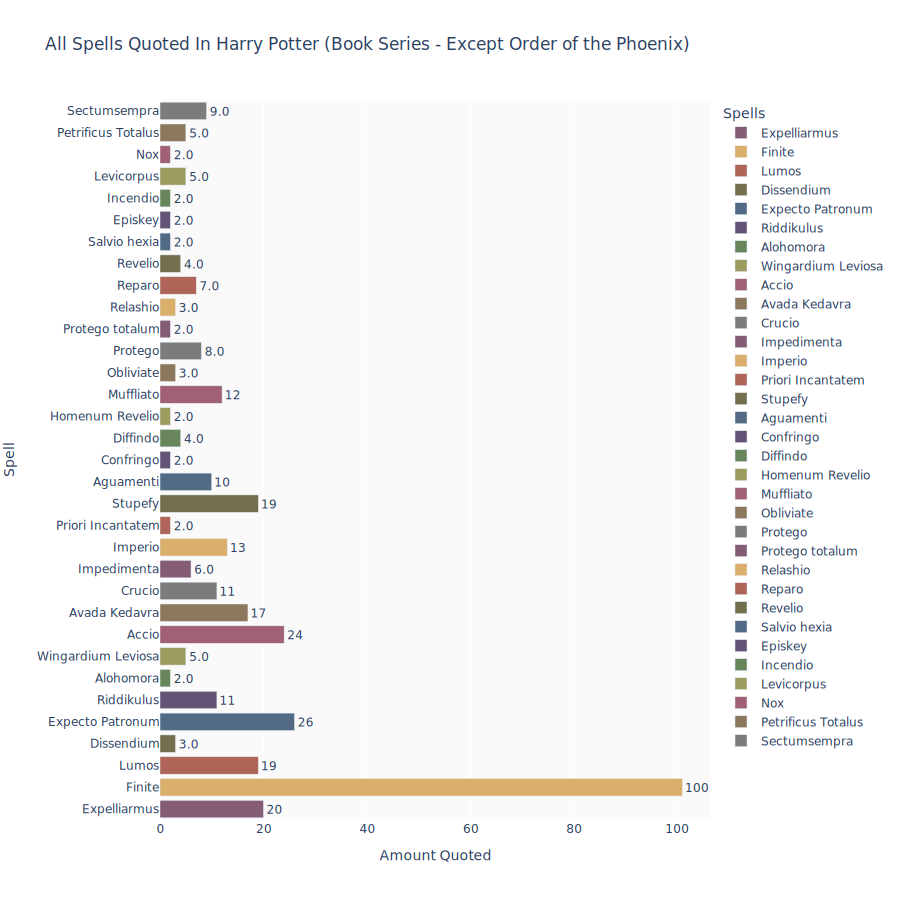

In [3]:
# creating the bar plot for all books
# using plotly
fig = px.bar(x=tracker.values(), y=tracker.keys(), text_auto='.2s', height=900,width=900,
            title="All Spells Quoted In Harry Potter (Book Series)", 
             labels={'x':'Amount Quoted','y':'Spell'}, orientation = 'h',
            color = tracker.keys(),color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(plot_bgcolor='#fafafa',legend_title_text='Spells')
fig.show("svg")

# creating the bar plot for all books - book 5
# using plotly
fig = px.bar(x=trackerOutFive.values(), y=trackerOutFive.keys(), text_auto='.2s', height=900, width=900,
            title="All Spells Quoted In Harry Potter (Book Series - Except Order of the Phoenix)", 
             labels={'x':'Amount Quoted','y':'Spell'}, orientation = 'h', 
             color = trackerOutFive.keys(),color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(plot_bgcolor='#fafafa', legend_title_text='Spells')
fig.show("svg")

## Analyzing the spells in the Harry Potter Film Series

Looking at the last graph, there were a total of 45 spells quoted in the movie series. We can also see that the amount of times the spells were quoted is significantly more than the amount of times each spell was quoted in the book series. Each spell was quoted several more times compared to the book series.
Unlike the book series, the spell quoted the most was "Riddikulus" - the Boggart-Banishing Spell. This spell was mentioned 746 times in the movie series while the second-most mentioned spell in the movie series was "Lumos Maxima" - produces bright light, which was mentioned 381 times. "Riddikulus" was mentioned almost two times as much as "Lumos Maxima". Interestingly, the only times "Riddikulus" was mentioned in the Harry Potter film series, was in the second film, "Harry Potter and the Prisoner of Azkaban. Therefore, in the second film of the Harry Potter film series, "Riddikulus" was mentioned 746 times.

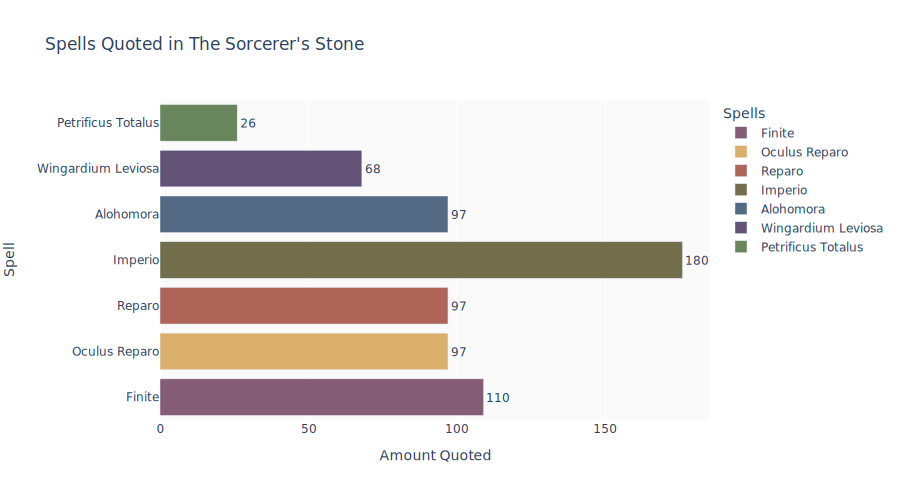

In [4]:
#Analyze pdf from movie 1 & count how many spells appear
reader = PdfReader('hp-movies/movie1.pdf')
textMovieOne = ""
trackerMovieOne = dict()


#function to extract text from PDF file and count occurances of spells
def readBook(pdf, trackerSpells, txt):
    for page in reader.pages:
        txt += page.extract_text() + "\n"
        for i in spells:
            occ = txt.lower().count(i.lower())
            if occ > 0:
                trackerSpells[i] = trackerSpells.get(i,0) + occ
    return trackerSpells

trackerMovieOne = readBook(reader, trackerMovieOne, textMovieOne)            


# creating the bar plot for movie 1
# using plotly
fig = px.bar(x=trackerMovieOne.values(), y=trackerMovieOne.keys(), text_auto='.2s',width=900,
            title="Spells Quoted in The Sorcerer's Stone", 
             labels={'x':'Amount Quoted','y':'Spell'}, orientation = 'h',
            color = trackerMovieOne.keys(),color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(plot_bgcolor='#fafafa',legend_title_text='Spells')
fig.show("svg")

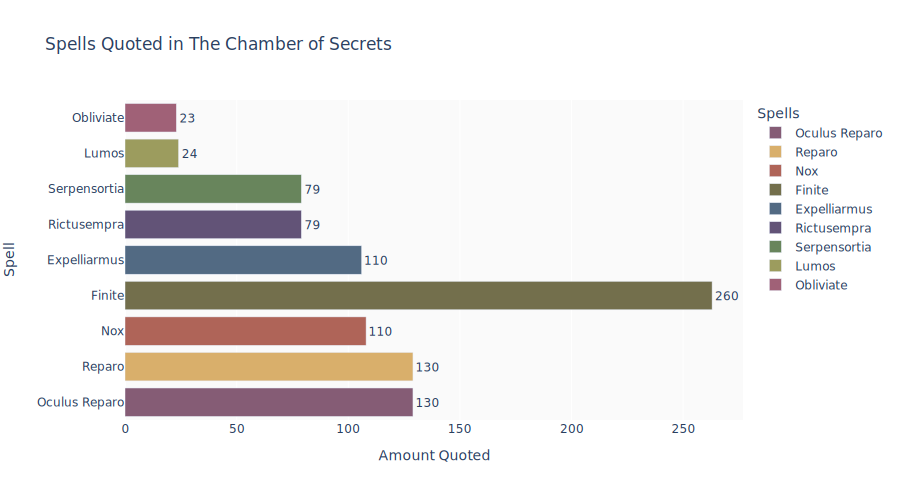

In [5]:
#Analyze pdf from movie 2 & count how many spells appear
reader = PdfReader('hp-movies/movie2.pdf')
textMovieTwo = ""
trackerMovieTwo = dict()
            
trackerMovieTwo = readBook(reader, trackerMovieTwo, textMovieTwo)            

# creating the bar plot for movie 2
# using plotly
fig = px.bar(x=trackerMovieTwo.values(), y=trackerMovieTwo.keys(), text_auto='.2s',width=900,
            title="Spells Quoted in The Chamber of Secrets", 
             labels={'x':'Amount Quoted','y':'Spell'}, orientation = 'h',
            color = trackerMovieTwo.keys(),color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(plot_bgcolor='#fafafa',legend_title_text='Spells')
fig.show("svg")

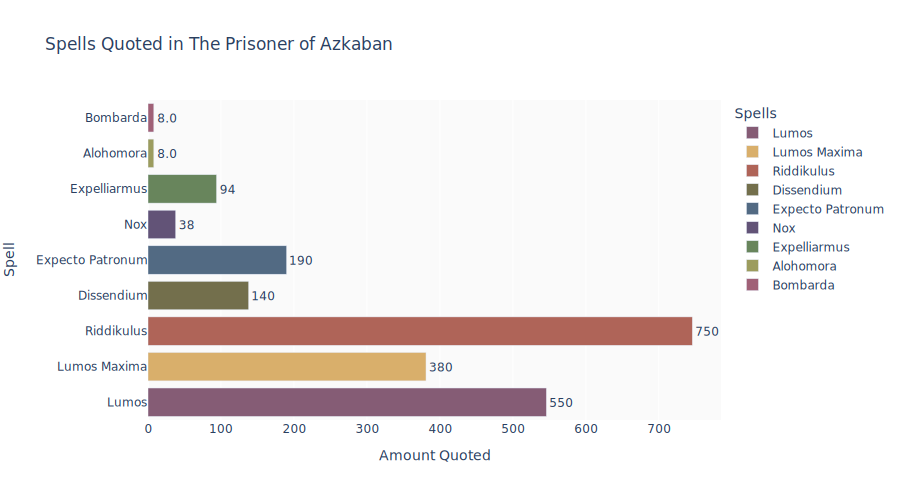

In [6]:
#Analyze pdf from movie 3 & count how many spells appear
reader = PdfReader('hp-movies/movie3.pdf')
textMovieThree = ""
trackerMovieThree = dict()

trackerMovieThree = readBook(reader, trackerMovieThree, textMovieThree)       

# creating the bar plot for movie 3
# using plotly
fig = px.bar(x=trackerMovieThree.values(), y=trackerMovieThree.keys(), text_auto='.2s',width=900,
            title="Spells Quoted in The Prisoner of Azkaban ", 
             labels={'x':'Amount Quoted','y':'Spell'}, orientation = 'h',
            color = trackerMovieThree.keys(),color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(plot_bgcolor='#fafafa',legend_title_text='Spells')
fig.show("svg")

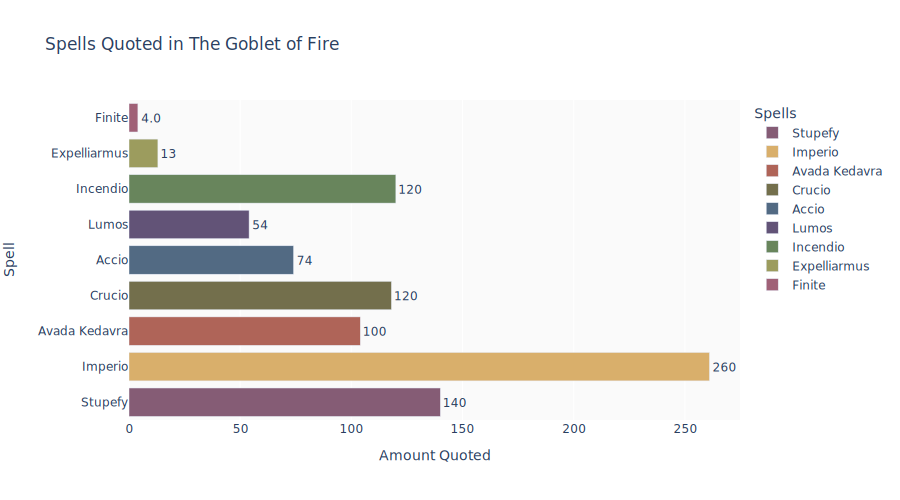

In [7]:
#Analyze pdf from movie 4 & count how many spells appear
reader = PdfReader('hp-movies/movie4.pdf')
textMovieFour = ""
trackerMovieFour = dict()

trackerMovieFour = readBook(reader, trackerMovieFour, textMovieFour)                    

# creating the bar plot for movie 4
# using plotly
fig = px.bar(x=trackerMovieFour.values(), y=trackerMovieFour.keys(), text_auto='.2s',width=900,
            title="Spells Quoted in The Goblet of Fire", 
             labels={'x':'Amount Quoted','y':'Spell'}, orientation = 'h',
            color = trackerMovieFour.keys(),color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(plot_bgcolor='#fafafa',legend_title_text='Spells')
fig.show("svg")

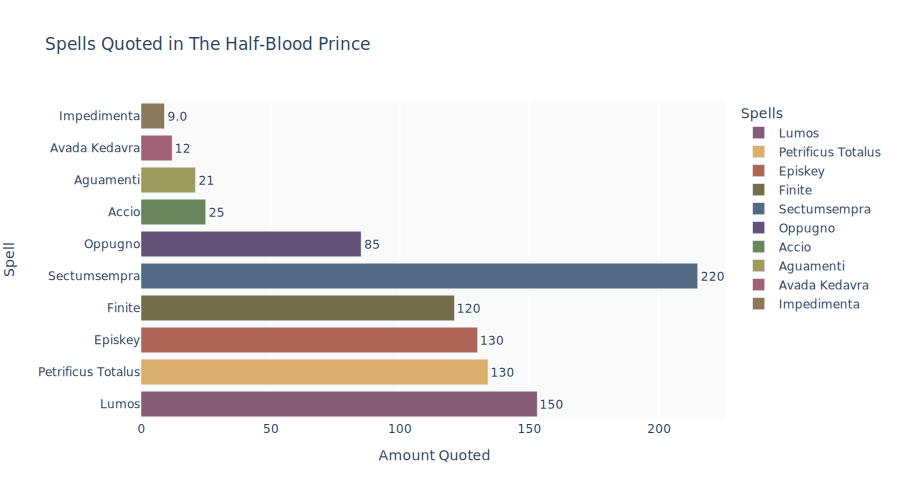

In [8]:
#Analyze pdf from movie 6 & count how many spells appear
reader = PdfReader('hp-movies/movie6.pdf')
textMovieSix = ""
trackerMovieSix = dict() 
            
trackerMovieSix = readBook(reader, trackerMovieSix, textMovieSix)                    

# creating the bar plot for movie 6
# using plotly
fig = px.bar(x=trackerMovieSix.values(), y=trackerMovieSix.keys(), text_auto='.2s',width=900,
            title="Spells Quoted in The Half-Blood Prince", 
             labels={'x':'Amount Quoted','y':'Spell'}, orientation = 'h',
            color = trackerMovieSix.keys(),color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(plot_bgcolor='#fafafa',legend_title_text='Spells')
fig.show("svg")

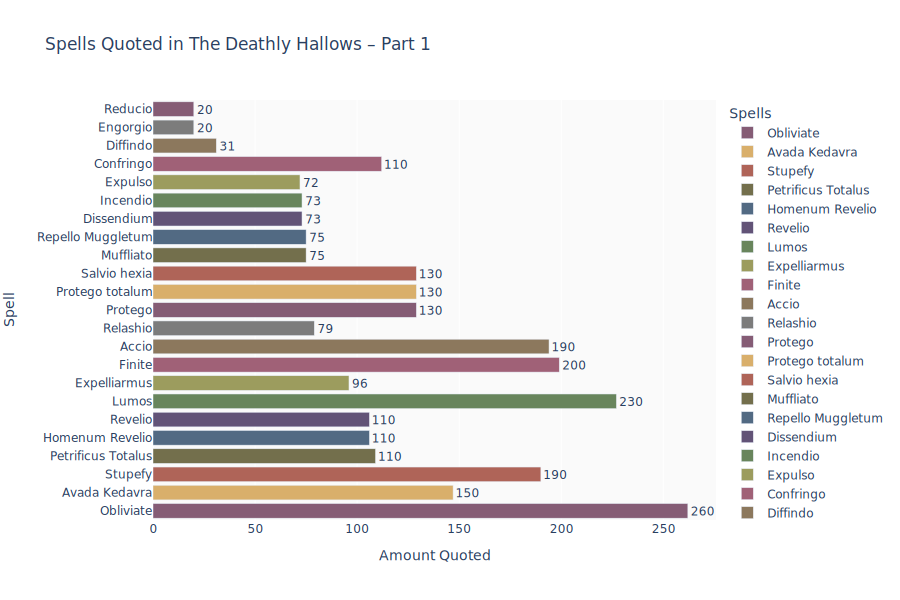

In [10]:
#Analyze pdf from movie 7-1 & count how many spells appear
reader = PdfReader('hp-movies/movie7-1.pdf')
textMovieSevenOne = ""
trackerMovieSevenOne = dict()    
            
trackerMovieSevenOne = readBook(reader, trackerMovieSevenOne, textMovieSevenOne)                    

# creating the bar plot for movie 7-1
# using plotly
fig = px.bar(x=trackerMovieSevenOne.values(), y=trackerMovieSevenOne.keys(), text_auto='.2s',height=600,width=900,
            title="Spells Quoted in The Deathly Hallows Part 1", 
             labels={'x':'Amount Quoted','y':'Spell'}, orientation = 'h',
            color = trackerMovieSevenOne.keys(),color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(plot_bgcolor='#fafafa',legend_title_text='Spells')
fig.show("svg")

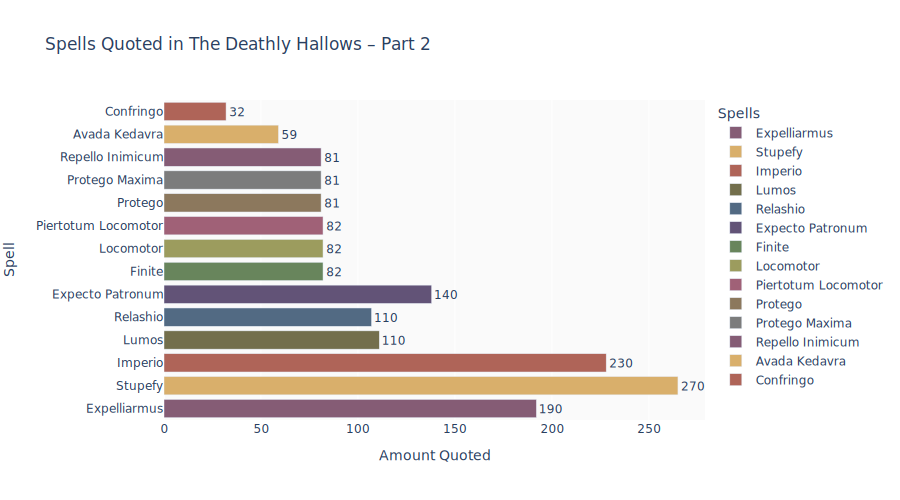

In [11]:
#Analyze pdf from movie 7-2 & count how many spells appear
reader = PdfReader('hp-movies/movie7-2.pdf')
textMovieSevenTwo = ""
trackerMovieSevenTwo = dict() 
            
trackerMovieSevenTwo = readBook(reader, trackerMovieSevenTwo, textMovieSevenTwo)                    

# creating the bar plot for movie 7-2
# using plotly
fig = px.bar(x=trackerMovieSevenTwo.values(), y=trackerMovieSevenTwo.keys(), text_auto='.2s',width=900,
            title="Spells Quoted in The Deathly Hallows Part 2", 
             labels={'x':'Amount Quoted','y':'Spell'}, orientation = 'h',
            color = trackerMovieSevenTwo.keys(),color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(plot_bgcolor='#fafafa',legend_title_text='Spells')
fig.show("svg")

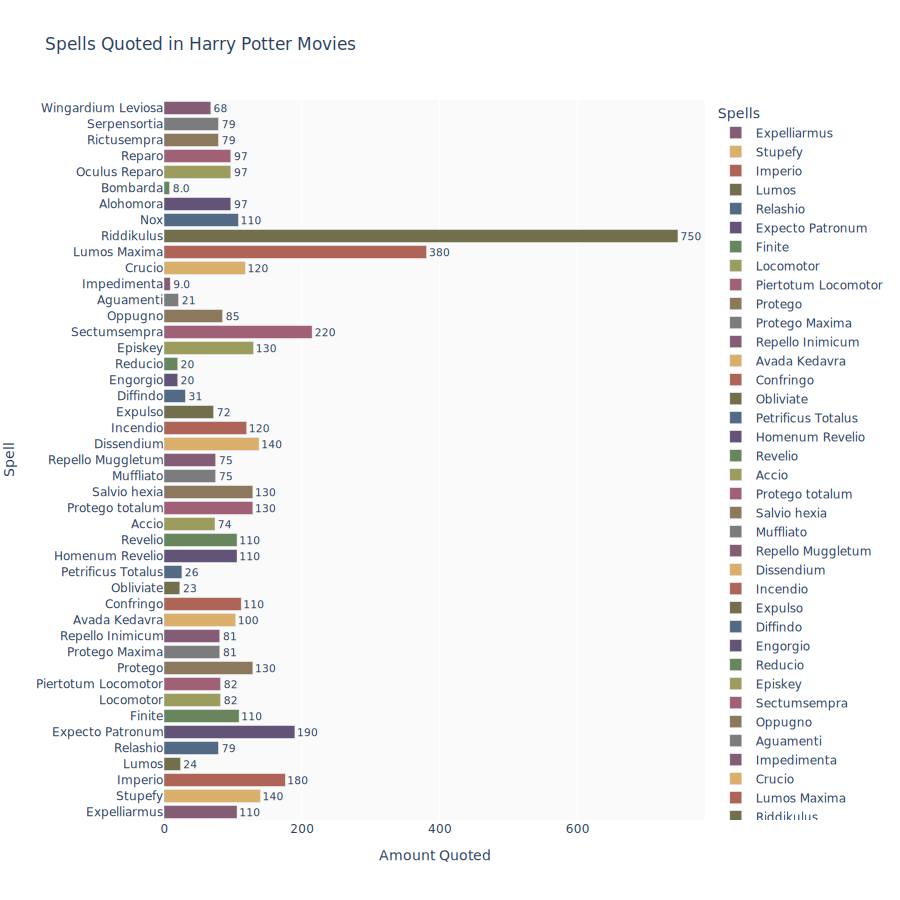

In [12]:
totalTracker = ChainMap(trackerMovieOne, trackerMovieTwo, trackerMovieThree, trackerMovieFour, trackerMovieSix, trackerMovieSevenOne, trackerMovieSevenTwo)

# creating the bar plot for all movies
# using plotly
fig = px.bar(x=totalTracker.values(), y=totalTracker.keys(), text_auto='.2s', height=900,width=900,
            title="Spells Quoted in Harry Potter Movies", 
             labels={'x':'Amount Quoted','y':'Spell'}, orientation = 'h',
            color = totalTracker.keys(),color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(plot_bgcolor='#fafafa',legend_title_text='Spells')
fig.show("svg")

## Analyzing scenes with spells

Utilizing one of the datasets that extracted specific dialogue scenes from the Harry Potter films, we can look at a few scenes that spells were quoted and which character said it.

Using a hashmap, we are able to read through the Dialogue.csv file which gives us the dialogue from each character along with the character's id. In the hashmap, the keys are the character's id and the values are a list of sentences that the character said. Furthermore, only sentences with spells were appended to the hashmap. To make the hashmap more straightforward, the character ids were replaced with the actual character's name. 

Note that any character from Harry Potter can be analyzed with this hashmap however, we will be analyzing a few of the main characters in the series.

In [13]:
#Make all spells lowercase
spelllower = [y.lower() for y in spells]

#create dict with keys as names/ids and values as diaglogues    
d = defaultdict(list)
with open('Harry_Potter_Movies/DialogueUni') as dia_file:
    reader = csv.DictReader(dia_file)
    for each in reader:
        for i in spelllower:
            if i in each['Dialogue'].lower():   
                d[each['Character ID']].append(each['Dialogue'])
                
#update dict with character names instead of id's
characNameDiag = defaultdict(list)
with open('Harry_Potter_Movies/CharactersUni.csv') as charac_file:
    readerCharac = csv.DictReader(charac_file)
    for each in readerCharac:
        for key, value in d.items():
            if each['Character ID'] == key:
                characNameDiag[each['Character Name']].append(value)
                

#### Analyzing scenes with Harry Potter

Using the hashmap that contains dialogue lines from the characters, we can analyze specific characters and count how many times each character said a spell.

First, we analyze Harry Potter. We can see what spells he said and how many times he said it. Observing the pie chart, we can see that "Lumos" - the Wand-Lighting Charm, and "Expecto Patronum" - the Patronus Charm, was Harry Potter's most declared spells.


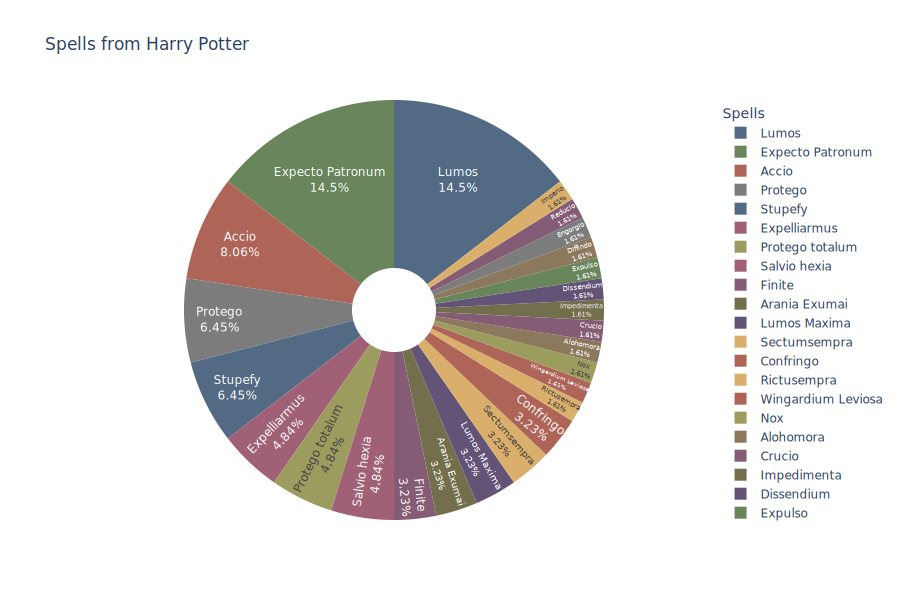

In [19]:
#Use a dict, make the spells as keys and its occurances as values
harryDiag = characNameDiag["Harry Potter"]
harrySpells = dict()

#function to go through character + diaglogue dict and count the amount of spells
def spellInDiag(final, values):
    for l in values:
        for sentence in l:
            sentence = re.sub(r'[^\w\s]', '', sentence)
            for spell in spells:
                if spell.lower() in sentence.lower():
                    if spell in final:
                        final[spell] = final.get(spell, 0) + 1
                    else:
                        final[spell] = 1
    return final
    
harry = spellInDiag(harrySpells, harryDiag)

#Create graph
f = px.pie(values=harry.values(), names=harry.keys(), title="Spells from Harry Potter",height=600,width=900,
           color = harry.keys(),color_discrete_sequence=px.colors.qualitative.Antique,hole=.2)
f.update_traces(textposition='inside', textinfo='percent+label',hovertemplate = 'Spell: %{label} <br>Amount: %{value}')
f.update_layout(plot_bgcolor='#fafafa',legend_title_text='Spells')
f.show("svg")

#### Analyzing scenes with Ron Weasley

Analyzing Ron Weasley, we can see what spells he said and how many times he said it. Observing the pie chart, we can see that "Imperio" - the Imperius Curse, "Alohomora" - the Unlocking Charm, and "Finite" - the General Counter-Spell was Ron Weasley's most declared spells.

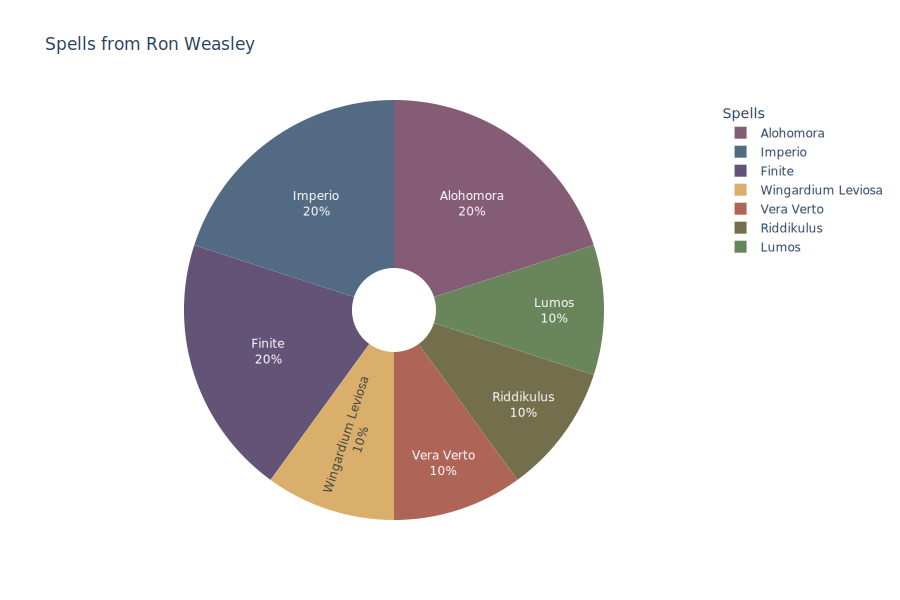

In [20]:
ronDiag = characNameDiag["Ron Weasley"]
ronSpells = dict()

ron = spellInDiag(ronSpells, ronDiag)

#Create graph
f = px.pie(values=ron.values(), names=ron.keys(), title="Spells from Ron Weasley",height=600,width=900,
           color = ron.keys(),color_discrete_sequence=px.colors.qualitative.Antique,hole=.2)
f.update_traces(textposition='inside', textinfo='percent+label',hovertemplate = 'Spell: %{label} <br>Amount: %{value}')
f.update_layout(plot_bgcolor='#fafafa',legend_title_text='Spells')
f.show("svg")

#### Analyzing scenes with Hermione Granger

Analyzing Hermione Granger, we can see what spells he said and how many times he said it. Observing the pie chart, we can see that "Lumos" - the Wand-Lighting Charm, "Reparo" - the Mending Charm, and "Oculus Reparo" - the spell that repairs glasses was Hermione Granger's most declared spells.

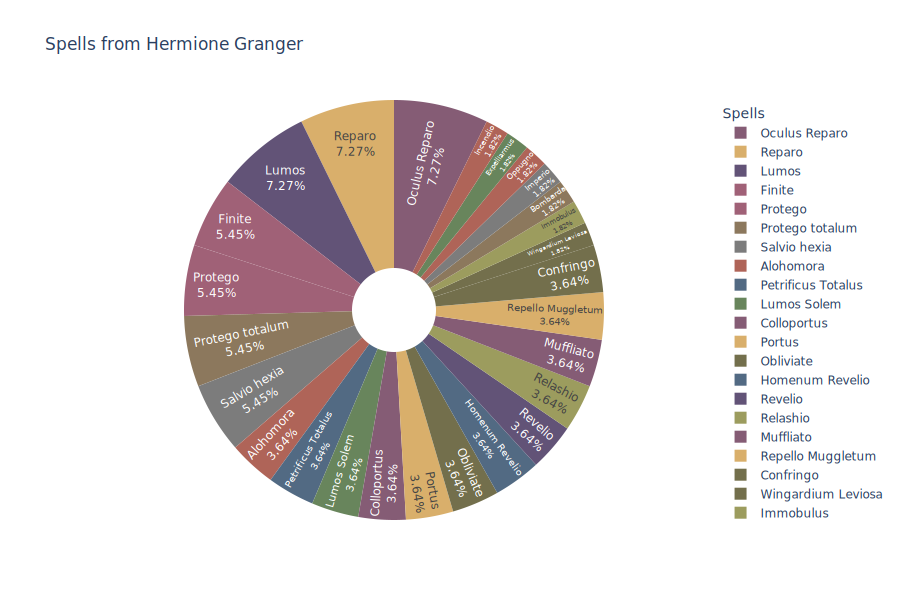

In [21]:
hermioneDiag = characNameDiag["Hermione Granger"]
hermioneSpells = dict()

hermione = spellInDiag(hermioneSpells, hermioneDiag)

#Create graph
f = px.pie(values=hermione.values(), names=hermione.keys(), title="Spells from Hermione Granger",height=600,width=900,
           color = hermione.keys(),color_discrete_sequence=px.colors.qualitative.Antique,hole=.2)
f.update_traces(textposition='inside', textinfo='percent+label',hovertemplate = 'Spell: %{label} <br>Amount: %{value}')
f.update_layout(plot_bgcolor='#fafafa',legend_title_text='Spells')
f.show("svg")

#### Analyzing scenes with Voldemort

In the Harry Potter series, Voldemort is also referred to as "Tom Riddle" so we extracted the dialogue scenes that were stated by Voldemort and Tom Riddle. Analyzing Voldemort, we can see what spells he said and how many times he said it. Observing the pie chart, we can see that "Avada Kedavra" - the Killing Curse, "Arania Exumai" - the Spider repelling spell, and "Cistem Aperio" - the spell that opens chests, were spells quoted by Voldemort.

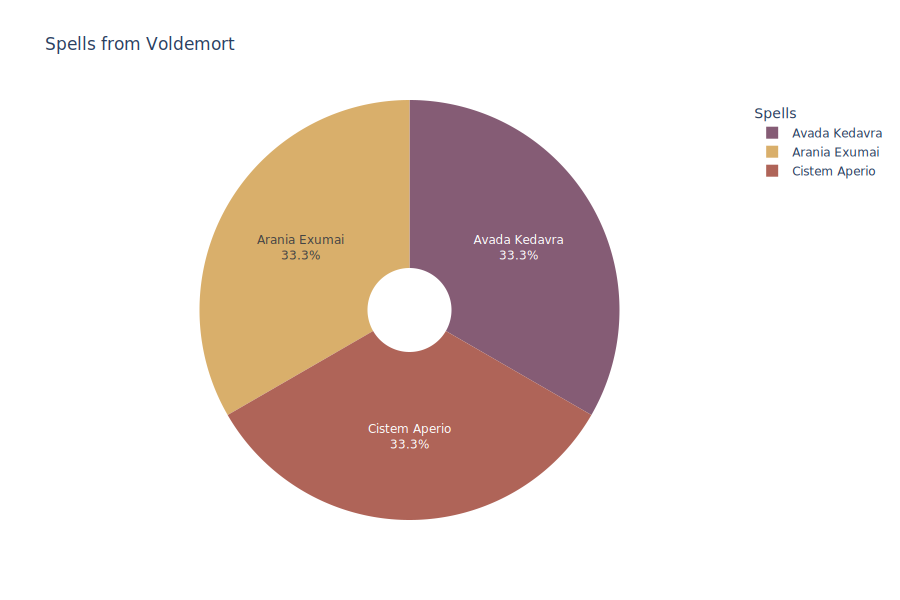

In [22]:
voldemortDiag = characNameDiag["Voldemort"] 
tomriddleDiag = characNameDiag["Tom Riddle"]
voldemortSpells = dict()

voldemort = spellInDiag(voldemortSpells, voldemortDiag)
voldemort = spellInDiag(voldemortSpells, tomriddleDiag)

#Create graph
f = px.pie(values=voldemort.values(), names=voldemort.keys(), title="Spells from Voldemort",height=600,width=900,
           color = voldemort.keys(),color_discrete_sequence=px.colors.qualitative.Antique,hole=.2)
f.update_traces(textposition='inside', textinfo='percent+label',hovertemplate = 'Spell: %{label} <br>Amount: %{value}')
f.update_layout(plot_bgcolor='#fafafa',legend_title_text='Spells')
f.show("svg")

#### Analyzing scenes with Albus Dumbledore

Analyzing Albus Dumbledore, we can see what spells he said and how many times he said it. Observing the pie chart, we can see that "Priori Incantatem" - the Reverse Spell, "Arresto Momentum" - the Slowing Charm, "Aguamenti" - the Water-Making Spell, "Lumos" - the Wand-Lighting Charm, and "Portus" - the spell that turns an object into Portkey, were spells quoted by Albus Dumbledore.

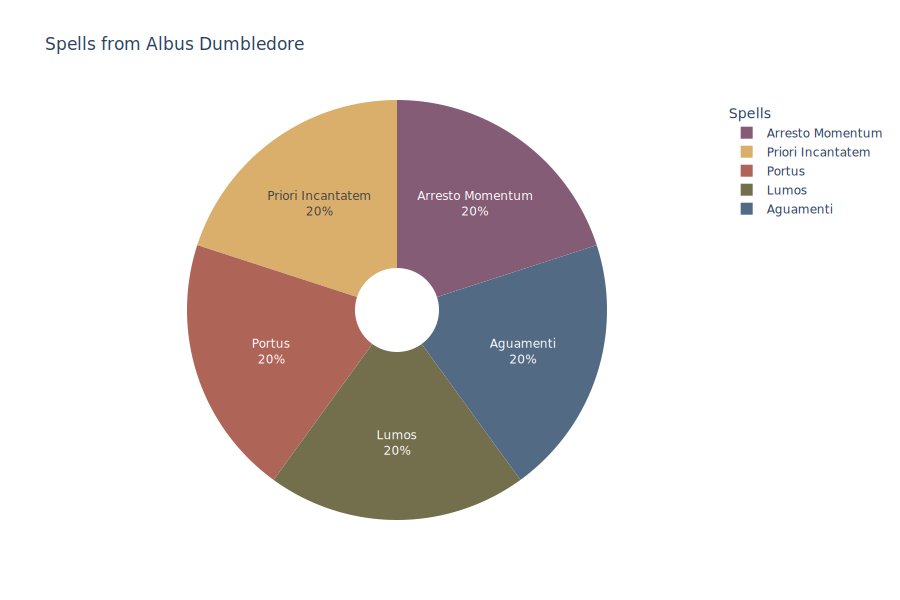

In [23]:
dumbledoreDiag = characNameDiag["Albus Dumbledore"] 
dumbledoreSpells = dict()

dumbledore = spellInDiag(dumbledoreSpells, dumbledoreDiag)

#Create graph
f = px.pie(values=dumbledore.values(), names=dumbledore.keys(), title="Spells from Albus Dumbledore",height=600,width=900,
           color = dumbledore.keys(),color_discrete_sequence=px.colors.qualitative.Antique,hole=.2)
f.update_traces(textposition='inside', textinfo='percent+label',hovertemplate = 'Spell: %{label} <br>Amount: %{value}')
f.update_layout(plot_bgcolor='#fafafa',legend_title_text='Spells')
f.show("svg")

#### Analyzing scenes with Severus Snape

Analyzing Severus Snape, we can see what spells he said and how many times he said it. Observing the pie chart, we can see that "Expelliarmus" - the Disarming Charm was the spell quoted by Severus Snape the most.

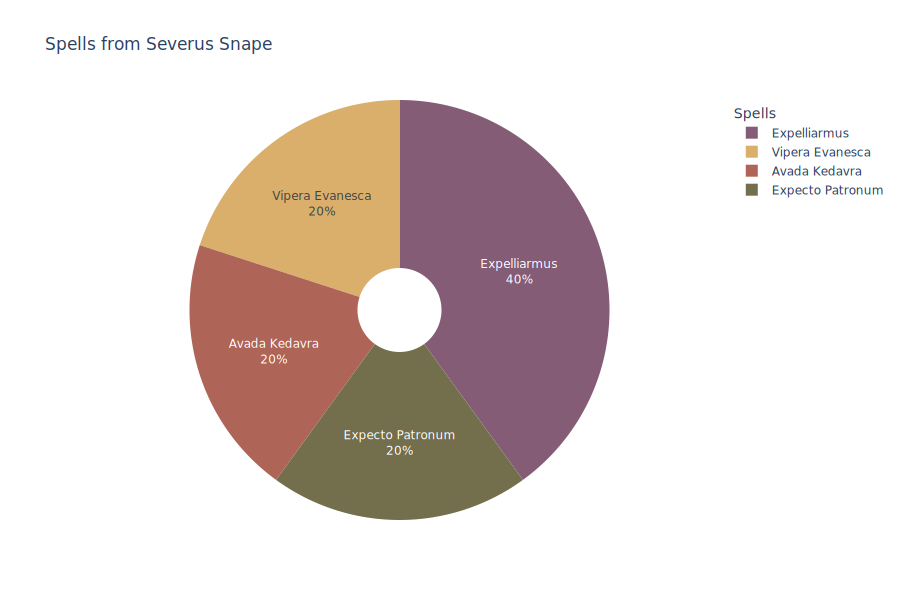

In [24]:
snapeDiag = characNameDiag["Severus Snape"] 
snapeSpells = dict()

snape = spellInDiag(snapeSpells, snapeDiag)

#Create graph
f = px.pie(values=snape.values(), names=snape.keys(), title="Spells from Severus Snape",height=600,width=900,
           color = snape.keys(),color_discrete_sequence=px.colors.qualitative.Antique,hole=.2)
f.update_traces(textposition='inside', textinfo='percent+label',hovertemplate = 'Spell: %{label} <br>Amount: %{value}')
f.update_layout(plot_bgcolor='#fafafa',legend_title_text='Spells')
f.show("svg")

## Conclusion

Comparing the spells quoted in the book series to the movie series, we can see that there is quite a significant difference. The only spell that was quoted over 30 times was "Finite". However, in the movie series, spells that were mentioned were easily quoted over 30 times. This great gap does make sense since it would be extensive to repeat the same spell an abundant of times. Looking at the main characters that were analyzed, the spells that they were most associated with is reasonable. For example, "Avada Kedavra" - the Killing Curse, was one of the spells that was associated with Voldemort which makes sense since Voldemort was one of the main villains of the Harry Potter series and "Avada Kedavra" - the Killing Curse is considered a Dark Spell.

Interestingly, discovering which spells are most associated with each character in the Harry Potter series can be analyzed even deeper. For example, if a character created a specific spell.

If we included the "Harry Potter and the Order of the Phoenix" film, our results may be significantly different.